<h1 style="text-align: center;">Infosys Springboard - Group 2</h1>


<h3 style="text-align: right;">
    Done by:<br>
  Midhru Jayan J<br>
  Harsini A B<br>
  Abinaya K<br>
  Kashish Sharma<br>
</h3>


## Preprocessing


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df=pd.read_csv("tesla .csv")

In [8]:
df.shape

(1692, 7)

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [16]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [37]:
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].round(4)

In [40]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.00,25.00,17.54,23.89,18766300,23.89
1,6/30/2010,25.79,30.42,23.30,23.83,17187100,23.83
2,7/1/2010,25.00,25.92,20.27,21.96,8218800,21.96
3,7/2/2010,23.00,23.10,18.71,19.20,5139800,19.20
4,7/6/2010,20.00,20.00,15.83,16.11,6866900,16.11


In [38]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

<p><b>There are no null values in the dataset</b></p>

In [41]:
df.duplicated().sum()

0

<p><b>There isn't any duplicates in the dataset </b></p>

## Outlier Detection

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


<Axes: >

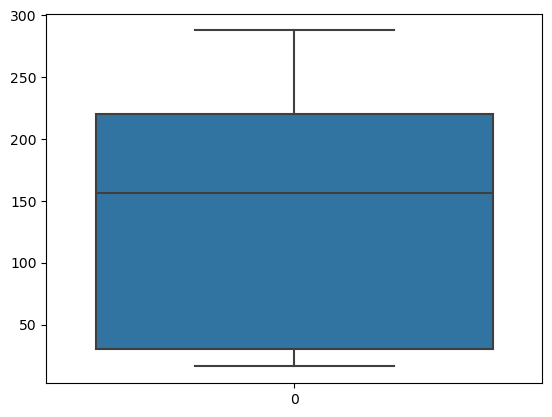

In [43]:
sns.boxplot(df['Open'])

<Axes: >

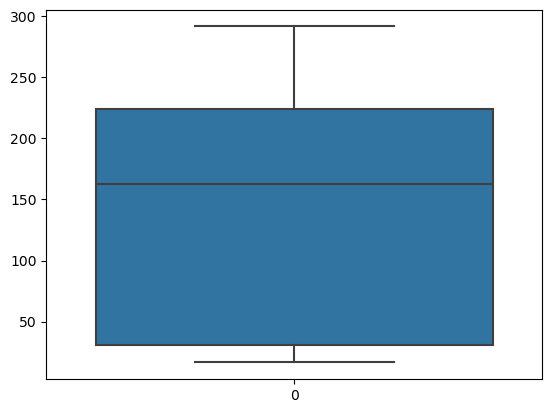

In [44]:
sns.boxplot(df['High'])

<Axes: >

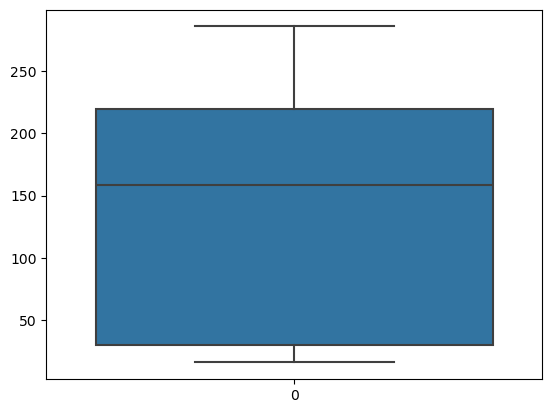

In [45]:
sns.boxplot(df['Close'])

<Axes: >

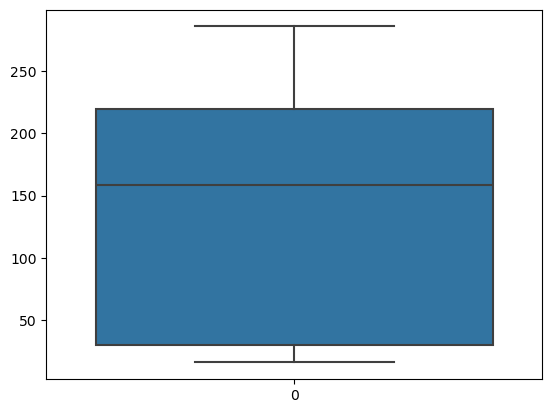

In [46]:
sns.boxplot(df['Adj Close'])

<Axes: >

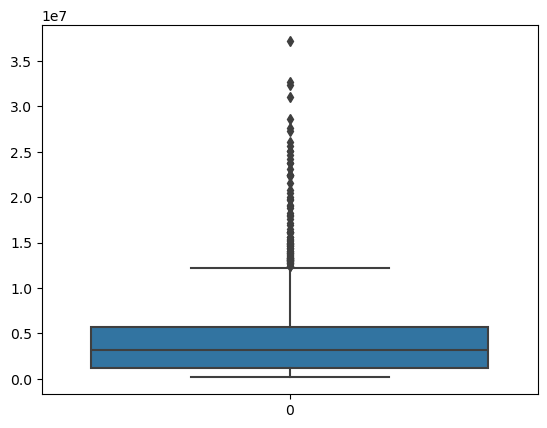

In [47]:
sns.boxplot(df['Volume'])

<p><b> As we can see from the above , there are outliers only for the volume column, other all columns have no outliers.</b></p>

In [49]:
df['Volume'].describe()


count    1.692000e+03
mean     4.270741e+06
std      4.295971e+06
min      1.185000e+05
25%      1.194350e+06
50%      3.180700e+06
75%      5.662100e+06
max      3.716390e+07
Name: Volume, dtype: float64

In [51]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [53]:
(df['Volume'] >= upper_bound).sum()


80

In [55]:
df_filtered = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]


In [57]:
print(df.shape)
print(df_filtered.shape)

(1692, 7)
(1612, 7)


<p><b>From the above we can see that the outliers have been removed</b></p>

## EDA

In [60]:
df_filtered['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

C:\Users\HP\AppData\Local\Temp\ipykernel_12028\953067229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')


In [62]:
df_filtered.head()

,Date,Open,High,Low,Close,Volume,Adj Close
2,2010-07-01,25.00,25.92,20.27,21.96,8218800,21.96
3,2010-07-02,23.00,23.10,18.71,19.20,5139800,19.20
4,2010-07-06,20.00,20.00,15.83,16.11,6866900,16.11
5,2010-07-07,16.40,16.63,14.98,15.80,6921700,15.80
6,2010-07-08,16.14,17.52,15.57,17.46,7711400,17.46


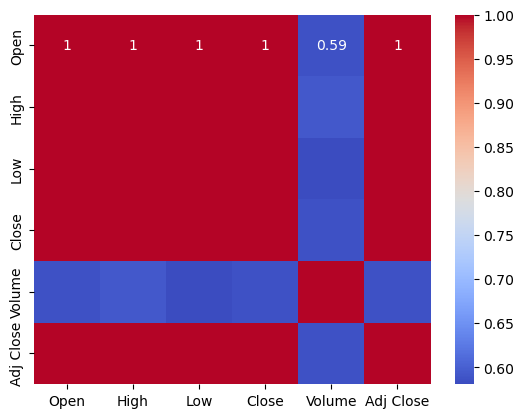

In [66]:
sns.heatmap(df_filtered[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


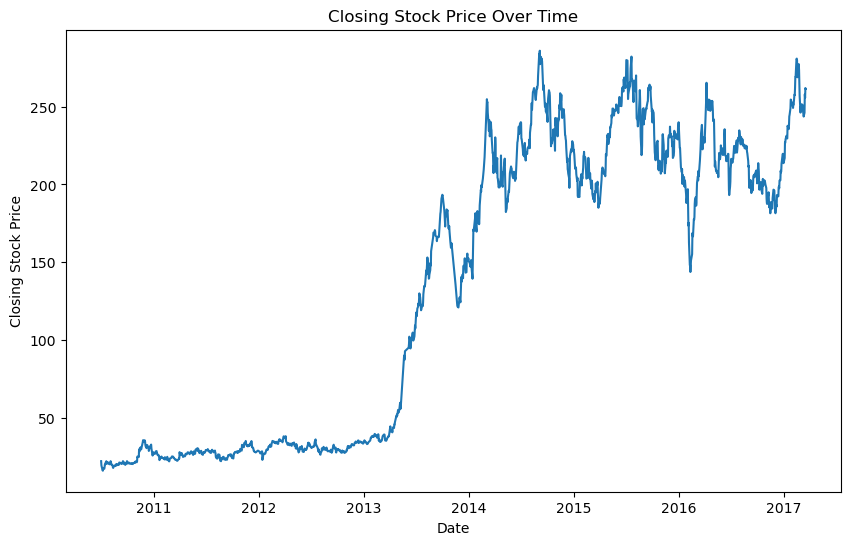

In [68]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df_filtered)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12028\2567573166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Date'].dt.year


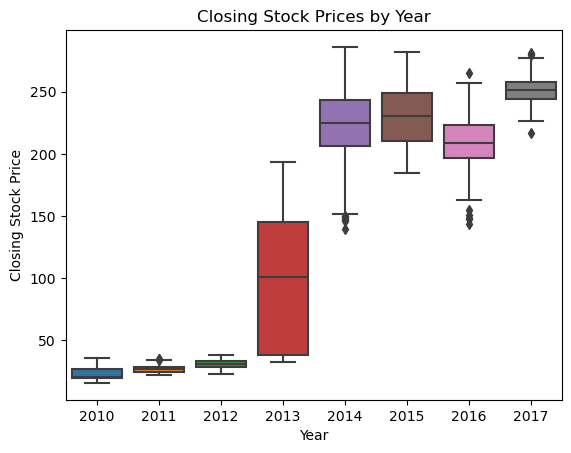

In [70]:
df_filtered['Year'] = df_filtered['Date'].dt.year
sns.boxplot(x='Year', y='Close', data=df_filtered)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


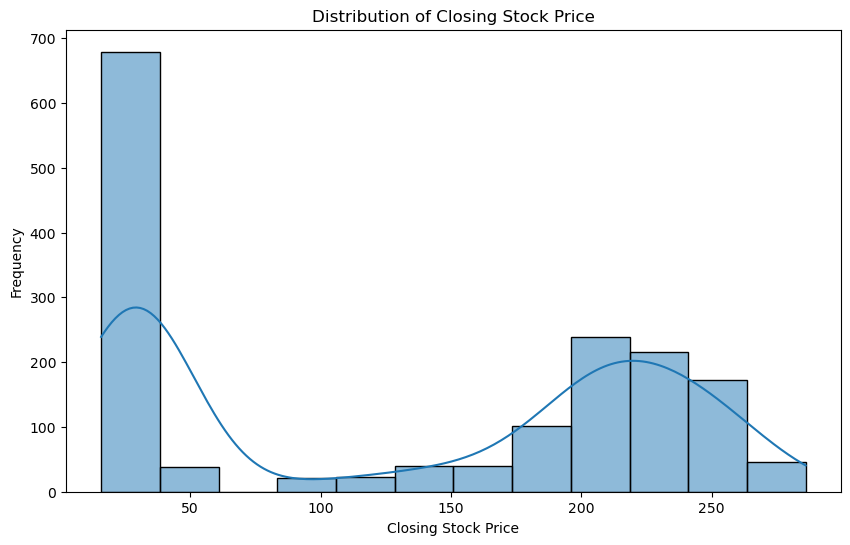

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

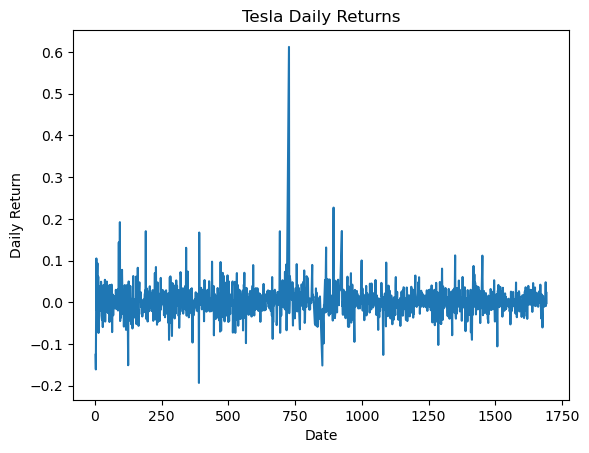

In [73]:
daily_returns = df_filtered['Close'].pct_change()
plt.plot(daily_returns.index, daily_returns.values)
plt.title('Tesla Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()